In [1]:
cd

/tmp


In [2]:
import os
os.listdir('/tmp/../')

['proc',
 'lib64',
 'tmp',
 'root',
 'home',
 'opt',
 'sbin',
 'etc',
 'dev',
 'usr',
 'bin',
 'boot',
 'media',
 'mnt',
 'run',
 'var',
 'srv',
 'lib',
 'sys',
 'kaggle',
 '.dockerenv',
 '.jupyter',
 'src',
 '.theanorc']

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display
print('Files in this directory:',os.listdir('../kaggle/input'))

Files in this directory: ['train_labels.csv', 'train', 'sample_submission.csv', 'test']


Files in this directory: ['test', 'train_labels.csv', 'train', 'sample_submission.csv']

In [4]:
def f(x):
    display(x)

In [5]:
images_list = os.listdir("../kaggle/input/train/")
print('Total number of training images:',len(images_list))

Total number of training images: 220025


Total number of training images: 220025

In [6]:
train_labels_df = pd.read_csv("../kaggle/input/train_labels.csv")
print("Total number of labels for training images: ",len(train_labels_df))

Total number of labels for training images:  220025


Total number of labels for training images:  220025

In [7]:
train_labels_df.columns.tolist()

['id', 'label']

['id', 'label']

In [8]:
print('First image id in training images:',images_list[0])
print("First image id in taining_labels csv:", train_labels_df.iloc[0,0])

First image id in training images: 437e629c0ad96457b71d4767761e09d6ef2d6fcb.tif
First image id in taining_labels csv: f38a6374c348f90b587e046aac6079959adf3835


#Visualize one image

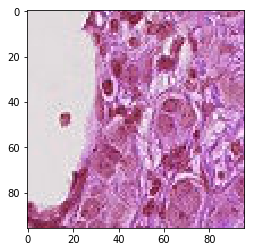

In [9]:
img = cv2.imread('../kaggle/input/train/'+ images_list[0]) #opencv color order BGR
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)     #opencv BGR format   

In [10]:
print('shape of img:',img.shape)

shape of img: (96, 96, 3)


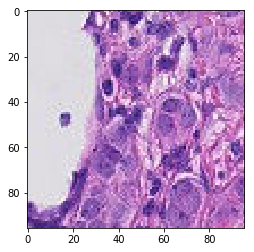

In [11]:
plt.imshow(rgb_img) #matplotlib color order RGB

In [12]:
print(type(train_labels_df.iloc[0,1]))
train_labels_df.iloc[0,1]

<class 'numpy.int64'>


0

In [13]:
print(type(train_labels_df.iloc[:,1]))
train_labels_df.iloc[:,1]

<class 'pandas.core.series.Series'>


0         0
1         1
2         0
3         0
4         0
5         0
6         1
7         1
8         0
9         0
10        0
11        1
12        0
13        0
14        1
15        0
16        0
17        1
18        0
19        1
20        0
21        0
22        0
23        1
24        1
25        0
26        0
27        0
28        1
29        1
         ..
219995    1
219996    0
219997    1
219998    1
219999    0
220000    0
220001    1
220002    1
220003    0
220004    0
220005    1
220006    0
220007    1
220008    0
220009    1
220010    1
220011    0
220012    1
220013    0
220014    1
220015    0
220016    0
220017    0
220018    0
220019    0
220020    0
220021    1
220022    0
220023    0
220024    1
Name: label, Length: 220025, dtype: int64

No. of positive and negative examples

In [14]:
total_images = train_labels_df.iloc[:,0].tolist()
print('Total no of images: ', len(total_images))
non_tumor_images = train_labels_df[train_labels_df.iloc[:,1] == 0]['id'].tolist()
print('No. of non-tumor images:',len(non_tumor_images))
tumor_images = train_labels_df[train_labels_df.iloc[:,1] == 1]['id'].tolist()
print('No. of tumor images:',len(tumor_images))


Total no of images:  220025
No. of non-tumor images: 130908
No. of tumor images: 89117


In [15]:
train_labels_df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

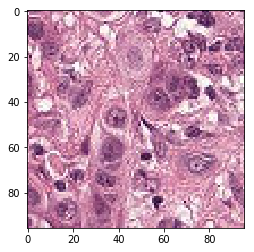

In [16]:
# '.tif' is not there at the end of image ids in train_label.csv
tum_img = cv2.imread('../kaggle/input/train/' + tumor_images[550] + '.tif')
tum_img_grey = cv2.imread('../kaggle/input/train/' + tumor_images[550] + '.tif', cv2.IMREAD_GRAYSCALE)
tum_img = cv2.cvtColor(tum_img, cv2.COLOR_BGR2RGB)

non_tum_img = cv2.imread('../kaggle/input/train/' + non_tumor_images[250] + '.tif')
non_tum_img = cv2.cvtColor(non_tum_img, cv2.COLOR_BGR2RGB)

plt.imshow(tum_img)

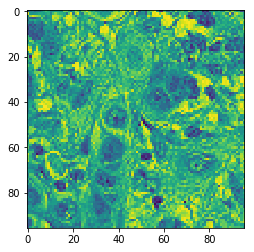

In [17]:
plt.imshow(tum_img_grey)

In [18]:
tum_img_grey.shape

(96, 96)

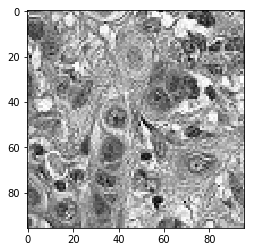

In [19]:
plt.imshow(tum_img_grey, cmap = 'gray')

In [20]:
non_tum_img.shape

(96, 96, 3)

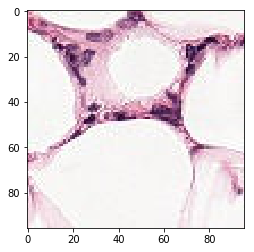

In [21]:
plt.imshow(non_tum_img)

In [22]:
#AfterWork-  write functions given an 'img id' it shld return 0/1

Issue - training images ends with .tif, train_labels.csv 1st column id doesn't end with .tif

In [23]:
print(images_list[0])
print(total_images[0])

437e629c0ad96457b71d4767761e09d6ef2d6fcb.tif
f38a6374c348f90b587e046aac6079959adf3835


Adding '.tif' at the end of each id in train_labels.csv

In [24]:
train_labels_df.iloc[:,0] = [train_labels_df.iloc[:,0][i] + '.tif' for i in range(len(train_labels_df.iloc[:,0]))]

In [25]:
train_labels_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [26]:
new_df = train_labels_df.copy()
new_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [27]:
train_images = new_df.iloc[:,0].tolist()

In [29]:
# column_names = [f'p{i}' for i in range(1, 48*48 +1)]
# column_names[-1]
# df1 = pd.DataFrame(columns = column_names)
# df1.head()

In [30]:
# # df1['index'] = [i for i in range(0,220025)]
# # df1['index'] = list(range(0,120025))
# df1['index']
# f(df1.head())
# f(df1.tail())

(96, 96)

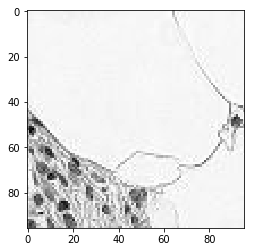

In [31]:
p = cv2.imread('../kaggle/input/train/' + train_images[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(p, cmap='gray')
p.shape

(48, 48)

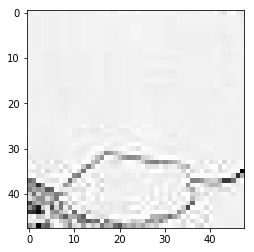

In [32]:
plt.imshow(p[31:79,31:79], cmap = 'gray')
p[31:79,31:79].shape

In [33]:
def crop(img):
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    crop_img = image[31:79,31:79]
    return crop_img
    

In [34]:
x = crop('../kaggle/input/train/'+train_images[0])
print('shape of x is:', x.shape)

shape of x is: (48, 48)


So, we need to convert the shape fr_m (48,48) to (48,48,1)

In [35]:
from numpy import newaxis
def crop_image(img):
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    crop_img = image[31:79,31:79]
    crop_img = crop_img[:,:,newaxis]    
    return crop_img

In [36]:
eg = crop_image('../kaggle/input/train/' + train_images[0])
print('shape of this image is:', eg.shape)
eg

shape of this image is: (48, 48, 1)


array([[[244],
        [247],
        [247],
        ...,
        [253],
        [243],
        [241]],

       [[248],
        [245],
        [246],
        ...,
        [247],
        [245],
        [242]],

       [[247],
        [245],
        [246],
        ...,
        [248],
        [247],
        [244]],

       ...,

       [[242],
        [250],
        [216],
        ...,
        [245],
        [245],
        [246]],

       [[244],
        [240],
        [243],
        ...,
        [245],
        [245],
        [245]],

       [[186],
        [211],
        [ 97],
        ...,
        [244],
        [245],
        [245]]], dtype=uint8)

In [37]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [38]:

classifier = Sequential()
classifier.add(Convolution2D(32,3,3, input_shape = (48,48,1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(128,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(256,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 256, activation = 'relu'))
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 64, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(48, 48, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  if sys.path[0] == '':
/opt

In [39]:
# def process(img):
#     img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#     img.resize((img.shape[0]*img.shape[1]))
# #     return img

In [40]:
# x = process('../kaggle//input/train/' + train_images[0])
# print('x from (96,96) shape to (96*96): ',x)

In [41]:
# for i in range(220025):
#     row = process('../input/train/' + train_images[i])
#     df1.loc[i] = row

In [42]:
from sklearn.utils import shuffle
shuffled_data =shuffle(new_df)

In [43]:
shuffled_data.head()

,id,label
33062,c79b186dcadf1fc1708cefabcbd03dcbae0b306c.tif,1
208200,c01b8da68b2c1888f0e99b718a2b913e17f6aa37.tif,0
2484,a6849487b033f18b1ddefbcd88b524523fd3cfa2.tif,0
38379,af5e5f5cc53e0a897016b72c35c62671d0067ce3.tif,1
145104,2863ff095743791703c8f5c270f3bb4ab40d7787.tif,1


In [44]:
len(shuffled_data)

220025

In [45]:
features = [crop_image('../kaggle/input/train/' + i) for i in  shuffled_data.iloc[:,0].tolist()]
print('Input features is a list containing ' + str(len(features)) + ' arrays')

Input features is a list containing 220025 arrays


In [46]:
print('shape of each example is:',features[0].shape)

shape of each example is: (48, 48, 1)


In [47]:
labels = shuffled_data.iloc[:,1].tolist()
print("labels is a list of ouput labels containing 0's and 1's")

labels is a list of ouput labels containing 0's and 1's


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.3)

In [49]:
print('Length of x_train', len(x_train))
print('Length of y_train', len(y_train))
print('Length of x_val', len(x_val))
print('Length of y_val', len(y_val))

Length of x_train 154017
Length of y_train 154017
Length of x_val 66008
Length of y_val 66008


In [50]:
print('No. of tumor examples in y_train =', sum(y_train))
print('No. of non-tumor examples in y_train =', len(y_train) - sum(y_train))
print('No. of tumor examples in y_val =', sum(y_val))
print('No. of non-tumor examples in y_val =', len(y_val) - sum(y_val))

No. of tumor examples in y_train = 62489
No. of non-tumor examples in y_train = 91528
No. of tumor examples in y_val = 26628
No. of non-tumor examples in y_val = 39380


In [51]:
print('type of x_train is:', type(x_train))
print('type of y_train is:', type(y_train))
print('type of x_val is:', type(x_val))
print('type of y_val is:', type(y_val))

type of x_train is: <class 'list'>
type of y_train is: <class 'list'>
type of x_val is: <class 'list'>
type of y_val is: <class 'list'>


But shape of data should be (examples, height, width, channels) which means its an array.

List doesn't have any shape. It only has length. 

So, we need to convert list into array.

Input features shape should be (examples, height, width, channels). For example (220025, 48, 48, 1)

In [52]:
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255

In [53]:
x_train

array([[[[0.96470588],
         [0.92941176],
         [0.92941176],
         ...,
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ]],

        [[0.8745098 ],
         [0.94901961],
         [0.92941176],
         ...,
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ]],

        [[0.84313725],
         [0.9372549 ],
         [0.91764706],
         ...,
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ]],

        ...,

        [[0.91764706],
         [0.91372549],
         [0.91372549],
         ...,
         [0.93333333],
         [0.9372549 ],
         [0.92156863]],

        [[0.91764706],
         [0.91372549],
         [0.91372549],
         ...,
         [0.91372549],
         [0.9254902 ],
         [0.93333333]],

        [[0.91372549],
         [0.90196078],
         [0.90588235],
         ...,
         [0.90588235],
         [0.91372549],
         [0.92156863]]],


       [[[0.30980392],
         [0.40784314],
         [0.57

In [54]:
print('shape of x_train is:', x_train.shape)
print('shape of x_val is:', x_val.shape)

shape of x_train is: (154017, 48, 48, 1)
shape of x_val is: (66008, 48, 48, 1)


In [ ]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(shear_range = 0.2, zoom_range = 0.2,
                   horizontal_flip = True)
classifier.fit_generator(datagen.flow(x_train, y_train, batch_size=20),
                    steps_per_epoch=len(x_train) / 20, epochs = 70)

Instructions for updating:
Use tf.cast instead.
Epoch 1/70
7701/7700 [==============================] - 96s 12ms/step - loss: 0.5129 - acc: 0.7562
Epoch 2/70
7701/7700 [==============================] - 93s 12ms/step - loss: 0.4875 - acc: 0.7739
Epoch 3/70
7701/7700 [==============================] - 93s 12ms/step - loss: 0.4773 - acc: 0.7806
Epoch 4/70
7701/7700 [==============================] - 93s 12ms/step - loss: 0.4701 - acc: 0.7850
Epoch 5/70
7701/7700 [==============================] - 93s 12ms/step - loss: 0.4644 - acc: 0.7880
Epoch 6/70
7701/7700 [==============================] - 93s 12ms/step - loss: 0.4589 - acc: 0.7903
Epoch 7/70
7701/7700 [==============================] - 92s 12ms/step - loss: 0.4566 - acc: 0.7924
Epoch 8/70
7701/7700 [==============================] - 93s 12ms/step - loss: 0.4535 - acc: 0.7938
Epoch 9/70
7701/7700 [==============================] - 93s 12ms/step - loss: 0.4493 - acc: 0.7961
Epoch 10/70
7701/7700 [==============================] - 93s 

So, the training accuracy is_ : 81%

70 epochs:
    Epoch 1/70
7701/7700 [==============================] - 82s 11ms/step - loss: 0.5062 - acc: 0.7616
Epoch 2/70
7701/7700 [==============================] - 77s 10ms/step - loss: 0.4801 - acc: 0.7792
Epoch 3/70
7701/7700 [==============================] - 76s 10ms/step - loss: 0.4716 - acc: 0.7844
Epoch 4/70
7701/7700 [==============================] - 75s 10ms/step - loss: 0.4653 - acc: 0.7875
Epoch 5/70
7701/7700 [==============================] - 75s 10ms/step - loss: 0.4597 - acc: 0.7914
Epoch 6/70
7701/7700 [==============================] - 75s 10ms/step - loss: 0.4532 - acc: 0.7930
Epoch 7/70
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4507 - acc: 0.7965
Epoch 8/70
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4478 - acc: 0.7970
Epoch 9/70
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4443 - acc: 0.7986
Epoch 10/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4417 - acc: 0.8000
Epoch 11/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4396 - acc: 0.8020
Epoch 12/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4368 - acc: 0.8027
Epoch 13/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4355 - acc: 0.8034
Epoch 14/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4331 - acc: 0.8049
Epoch 15/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4326 - acc: 0.8062
Epoch 16/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4308 - acc: 0.8074
Epoch 17/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4284 - acc: 0.8081
Epoch 18/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4275 - acc: 0.8079
Epoch 19/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4263 - acc: 0.8102
Epoch 20/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4253 - acc: 0.8097
Epoch 21/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4237 - acc: 0.8102
Epoch 22/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4256 - acc: 0.8103
Epoch 23/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4219 - acc: 0.8122
Epoch 24/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4224 - acc: 0.8116
Epoch 25/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4212 - acc: 0.8129
Epoch 26/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4191 - acc: 0.8143
Epoch 27/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4233 - acc: 0.8120
Epoch 28/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4212 - acc: 0.8130
Epoch 29/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4216 - acc: 0.8128
Epoch 30/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4172 - acc: 0.8150
Epoch 31/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4169 - acc: 0.8152
Epoch 32/70
7701/7700 [==============================] - 73s 10ms/step - loss: 0.4172 - acc: 0.8148
Epoch 33/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4166 - acc: 0.8150
Epoch 34/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4148 - acc: 0.8159
Epoch 35/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4176 - acc: 0.8140
Epoch 36/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4148 - acc: 0.8172
Epoch 37/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4170 - acc: 0.8172
Epoch 38/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4126 - acc: 0.8180
Epoch 39/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4140 - acc: 0.8167
Epoch 40/70
7701/7700 [==============================] - 70s 9ms/step - loss: 0.4122 - acc: 0.8184
Epoch 41/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4107 - acc: 0.8188
Epoch 42/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4123 - acc: 0.8179
Epoch 43/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4115 - acc: 0.8192
Epoch 44/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4089 - acc: 0.8207
Epoch 45/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4077 - acc: 0.8213
Epoch 46/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4159 - acc: 0.8165
Epoch 47/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4083 - acc: 0.8201
Epoch 48/70
7701/7700 [==============================] - 70s 9ms/step - loss: 0.4160 - acc: 0.8166
Epoch 49/70
7701/7700 [==============================] - 70s 9ms/step - loss: 0.4075 - acc: 0.8206
Epoch 50/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4052 - acc: 0.8214
Epoch 51/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4040 - acc: 0.8219
Epoch 52/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4112 - acc: 0.8196
Epoch 53/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4110 - acc: 0.8212
Epoch 54/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4087 - acc: 0.8188
Epoch 55/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4108 - acc: 0.8180
Epoch 56/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4030 - acc: 0.8228
Epoch 57/70
7701/7700 [==============================] - 69s 9ms/step - loss: 0.4039 - acc: 0.8220
Epoch 58/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4001 - acc: 0.8241
Epoch 59/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.3999 - acc: 0.8239
Epoch 60/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4069 - acc: 0.8219
Epoch 61/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4046 - acc: 0.8223
Epoch 62/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4039 - acc: 0.8219
Epoch 63/70
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4040 - acc: 0.8230
Epoch 64/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4014 - acc: 0.8239
Epoch 65/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4095 - acc: 0.8220
Epoch 66/70
7701/7700 [==============================] - 70s 9ms/step - loss: 0.4034 - acc: 0.8231
Epoch 67/70
7701/7700 [==============================] - 72s 9ms/step - loss: 0.3996 - acc: 0.8233
Epoch 68/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4069 - acc: 0.8228
Epoch 69/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4079 - acc: 0.8212
Epoch 70/70
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4022 - acc: 0.8237

In [ ]:
# c = np.reshape(y, y.shape + (1,))  -> (48,48) to (48,48,1)

WARNING:tensorflow:From /opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.5148 - acc: 0.7533
Epoch 2/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4845 - acc: 0.7763
Epoch 3/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4765 - acc: 0.7813
Epoch 4/20
7701/7700 [==============================] - 75s 10ms/step - loss: 0.4717 - acc: 0.7839
Epoch 5/20
7701/7700 [==============================] - 76s 10ms/step - loss: 0.4640 - acc: 0.7881
Epoch 6/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4588 - acc: 0.7918
Epoch 7/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4549 - acc: 0.7935
Epoch 8/20
7701/7700 [==============================] - 75s 10ms/step - loss: 0.4515 - acc: 0.7958
Epoch 9/20
7701/7700 [==============================] - 77s 10ms/step - loss: 0.4471 - acc: 0.7990
Epoch 10/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4446 - acc: 0.7992
Epoch 11/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4417 - acc: 0.8008
Epoch 12/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4387 - acc: 0.8026
Epoch 13/20
7701/7700 [==============================] - 76s 10ms/step - loss: 0.4366 - acc: 0.8041
Epoch 14/20
7701/7700 [==============================] - 73s 10ms/step - loss: 0.4346 - acc: 0.8042
Epoch 15/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4335 - acc: 0.8065
Epoch 16/20
7701/7700 [==============================] - 75s 10ms/step - loss: 0.4318 - acc: 0.8068
Epoch 17/20
7701/7700 [==============================] - 76s 10ms/step - loss: 0.4299 - acc: 0.8077
Epoch 18/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4273 - acc: 0.8098
Epoch 19/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4265 - acc: 0.8092
Epoch 20/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4254 - acc: 0.8100

After rescaling:
    Epoch 1/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.5090 - acc: 0.7600
Epoch 2/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4840 - acc: 0.7770
Epoch 3/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4756 - acc: 0.7820
Epoch 4/20
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4696 - acc: 0.7858
Epoch 5/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4642 - acc: 0.7887
Epoch 6/20
7701/7700 [==============================] - 77s 10ms/step - loss: 0.4602 - acc: 0.7915
Epoch 7/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4551 - acc: 0.7943
Epoch 8/20
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4519 - acc: 0.7961
Epoch 9/20
7701/7700 [==============================] - 71s 9ms/step - loss: 0.4471 - acc: 0.7982
Epoch 10/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4451 - acc: 0.7990
Epoch 11/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4424 - acc: 0.8010
Epoch 12/20
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4379 - acc: 0.8037
Epoch 13/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4363 - acc: 0.8040
Epoch 14/20
7701/7700 [==============================] - 74s 10ms/step - loss: 0.4348 - acc: 0.8050
Epoch 15/20
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4319 - acc: 0.8061
Epoch 16/20
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4286 - acc: 0.8081
Epoch 17/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4279 - acc: 0.8082
Epoch 18/20
7701/7700 [==============================] - 73s 9ms/step - loss: 0.4246 - acc: 0.8098
Epoch 19/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4228 - acc: 0.8117
Epoch 20/20
7701/7700 [==============================] - 72s 9ms/step - loss: 0.4224 - acc: 0.8110
    
    

In [ ]:
weights = classifier.weights
weights

In [ ]:
predictions = classifier.predict(x_val)
predictions

In [ ]:
predictions.shape

In [ ]:
predictions.resize(66008,)

In [ ]:
predictions

In [ ]:
y_val_pred = list(predictions)

In [ ]:
y_val_predicted = [1  if i > 0.5 else 0 for i in y_val_pred]
y_val_predicted2 = [1  if i > 0.1 else 0 for i in y_val_pred]

sum(y_val_predicted)

In [ ]:
sum(y_val_predicted2)

In [ ]:
np.unique(y_val_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_val_predicted)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_predicted)

In [ ]:
x_val2 = x_val
datagen.fit(x_val2)

In [ ]:
predictions2 = classifier.predict(x_val2)
predictions2

In [ ]:
sum(predictions2)

In [ ]:
np.unique(predictions2)

In [ ]:
predictions2.shape

In [ ]:
predictions2.resize(66008,)
predictions2.shape

In [ ]:
y_val_pred3 = list(predictions2)

In [ ]:
y_val_predicted3 = [1  if i > 0.5 else 0 for i in y_val_pred3]

In [ ]:
sum(y_val_predicted3)

In [ ]:
np.unique(y_val_predicted3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_val_predicted3)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_predicted3)

In [ ]:
classifier2 = Sequential()

classifier2.add(Convolution2D(32,3,3, input_shape = (48,48,1), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
classifier2.add(Dropout(0.2))

classifier2.add(Convolution2D(64,3,3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
classifier2.add(Dropout(0.2))
classifier2.add(Convolution2D(128,3,3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
classifier2.add(Dropout(0.2))

classifier2.add(Convolution2D(256,3,3, activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
classifier2.add(Dropout(0.2))

classifier2.add(Flatten())
classifier2.add(Dense(output_dim = 256, activation = 'relu'))
classifier2.add(Dropout(0.2))
classifier2.add(Dense(output_dim = 128, activation = 'relu'))
classifier2.add(Dropout(0.2))
classifier2.add(Dense(output_dim = 64, activation = 'relu'))
classifier2.add(Dropout(0.2))
classifier2.add(Dense(output_dim = 1, activation = "sigmoid"))

classifier2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

classifier2.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,
                   horizontal_flip = True)
datagen.fit(x_train)
classifier2.fit_generator(datagen.flow(x_train, y_train, batch_size=20),
                    steps_per_epoch=len(x_train) / 20, epochs = 20)

If we use dropout:
Epoch 1/20
7701/7700 [==============================] - 83s 11ms/step - loss: 0.6758 - acc: 0.5944
Epoch 2/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6754 - acc: 0.5945
Epoch 3/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6753 - acc: 0.5945
Epoch 4/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6753 - acc: 0.5945
Epoch 5/20
7701/7700 [==============================] - 80s 10ms/step - loss: 0.6753 - acc: 0.5945
Epoch 6/20
7701/7700 [==============================] - 78s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 7/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 8/20
7701/7700 [==============================] - 78s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 9/20
7701/7700 [==============================] - 80s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 10/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 11/20
7701/7700 [==============================] - 78s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 12/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 13/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 14/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 15/20
7701/7700 [==============================] - 78s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 16/20
7701/7700 [==============================] - 78s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 17/20
7701/7700 [==============================] - 80s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 18/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 19/20
7701/7700 [==============================] - 78s 10ms/step - loss: 0.6752 - acc: 0.5945
Epoch 20/20
7701/7700 [==============================] - 79s 10ms/step - loss: 0.6752 - acc: 0.5945

    

In [ ]:
weights2 = classifier2.weights
weights2

In [ ]:
predictions4 = classifier.predict(x_val)
predictions4

In [ ]:
predictions4.resize(66008,)
predictions4

In [ ]:
y_val_pred4 = list(predictions4)
y_val_predicted4 = [1  if i > 0.5 else 0 for i in y_val_pred4]
sum(y_val_predicted4)


In [ ]:
np.unique(y_val_pred4)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_val_predicted4)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_predicted4)

In [ ]:
test_images = os.listdir("../kaggle/input/test/")
print('Total number of training images:',len(test_images))


In [ ]:
test_features = [crop_image('../kaggle/input/test/' + i) for i in  test_images]
test_features = np.array(test_features)
test_features = test_features/255
test_features[0]
test_features.shape

In [ ]:
test_preds = classifier.predict(test_features)
test_preds.resize(57458,)
test_preds = list(test_preds)
test_values = [1  if i > 0.5 else 0 for i in test_preds]

In [ ]:
sum(test_values)

In [ ]:
df = {}
df['id'] = [i.split('.')[0] for i in test_images]
df['label'] = test_preds

In [ ]:
test_images[0]

In [ ]:
import pandas as pd

In [ ]:
DataFrame = pd.DataFrame.from_dict(df)
DataFrame

In [ ]:
submission_file = pd.read_csv('../kaggle/input/sample_submission.csv')

In [ ]:
submission = DataFrame
submission.to_csv('predictions.csv', columns=['label']) 

In [ ]:
submission.head()